In [1]:
from spacepy import pycdf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy import stats
from mpl_toolkits.mplot3d import axes3d
import matplotlib
import matplotlib.colors as colors
from collections import Counter
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import math
from lmfit.models import GaussianModel
from sklearn import mixture
from matplotlib.colors import LogNorm
from sklearn import cluster
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile

In [2]:
df = pd.read_excel('perp_halo_psd_bp.xlsx', sheet_name='Sheet1')
print("Column headings:")
print(df.columns)

Column headings:
Index(['Wind Speed', 'BP'], dtype='object')


In [3]:
new_df = df.sort_values(by='Wind Speed')
sort_df = new_df[18:2627] #remove values below 250 and above 750 km/s because there aren't many

In [4]:
bins = np.linspace(250,750,11)
groups = sort_df.groupby(pd.cut(sort_df['Wind Speed'],bins))
print("Perpedicular halo medians:")
print(groups.mean())

Perpedicular halo medians:
                Wind Speed         BP
Wind Speed                           
(250.0, 300.0]  287.829806  51.418374
(300.0, 350.0]  323.412881  46.791283
(350.0, 400.0]  375.629164  48.545459
(400.0, 450.0]  424.972680  46.221741
(450.0, 500.0]  472.463454  42.803765
(500.0, 550.0]  523.379532  36.261923
(550.0, 600.0]  578.586689  34.027207
(600.0, 650.0]  625.990842  32.395354
(650.0, 700.0]  666.790681  31.001576
(700.0, 750.0]  718.846386  29.297446


In [5]:
#halo
ta = []
for i in range(10):
    ta.append(np.array(groups)[i,1]['BP'])

Text(0,0.5,'Breakpoint Energy (eV)')

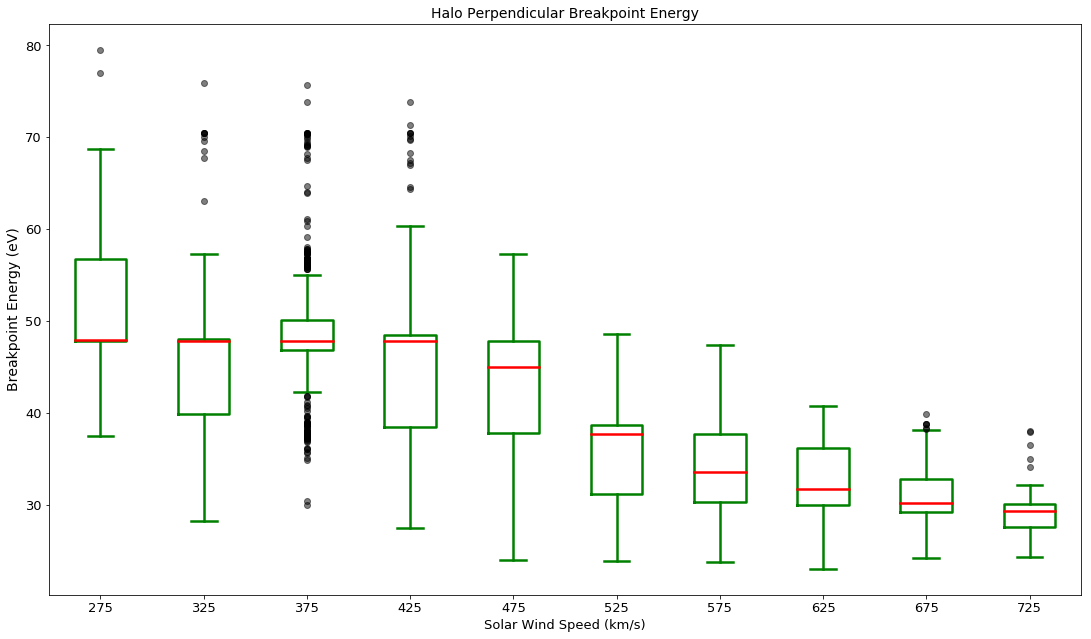

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
ax.set_title('Halo Perpendicular Breakpoint Energy',fontsize=14)
box_plot = ax.boxplot(ta)

## change outline color, fill color and linewidth of the boxes
for box in box_plot['boxes']:
    # change outline color
    box.set( color='g', linewidth=2.5)

## change color and linewidth of the whiskers
for whisker in box_plot['whiskers']:
    whisker.set(color='g', linewidth=2.5)

## change color and linewidth of the caps
for cap in box_plot['caps']:
    cap.set(color='g', linewidth=2.5)

## change color and linewidth of the medians
for median in box_plot['medians']:
    median.set(color='r', linewidth=2.5)

## change the style of fliers and their fill
for flier in box_plot['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

ax.set_xticklabels(['275', '325', '375', '425', '475', '525', '575', '625', '675', '725'])
ax.tick_params(labelsize=13)
ax.set_xlabel('Solar Wind Speed (km/s)',fontsize=13)
ax.set_ylabel('Breakpoint Energy (eV)',fontsize=14)

In [7]:
df1 = pd.read_excel('strahl_psd_bp.xlsx', sheet_name='Sheet1')
new_df1 = df1.sort_values(by='Wind Speed')

In [8]:
sort_df1 = new_df1[9:2003] #remove values below 250 and above 750 km/s because there aren't many

In [9]:
bins1 = np.linspace(250,750,11)
groups1 = sort_df1.groupby(pd.cut(sort_df1['Wind Speed'],bins1))
print("Strahl medians:")
print(groups1.median())

Strahl medians:
                Wind Speed         BP
Wind Speed                           
(250.0, 300.0]  290.396126  47.864998
(300.0, 350.0]  321.522153  47.864998
(350.0, 400.0]  375.335052  47.735590
(400.0, 450.0]  424.843653  46.064117
(450.0, 500.0]  469.801604  39.238540
(500.0, 550.0]  522.422492  37.452630
(550.0, 600.0]  575.994730  36.865818
(600.0, 650.0]  627.440249  33.051707
(650.0, 700.0]  661.385452  30.478845
(700.0, 750.0]  716.576005  28.662478


In [10]:
#strahl
ta1 = []
for i in range(10):
    ta1.append(np.array(groups1)[i,1]['BP'])

Text(0,0.5,'Breakpoint Energy (eV)')

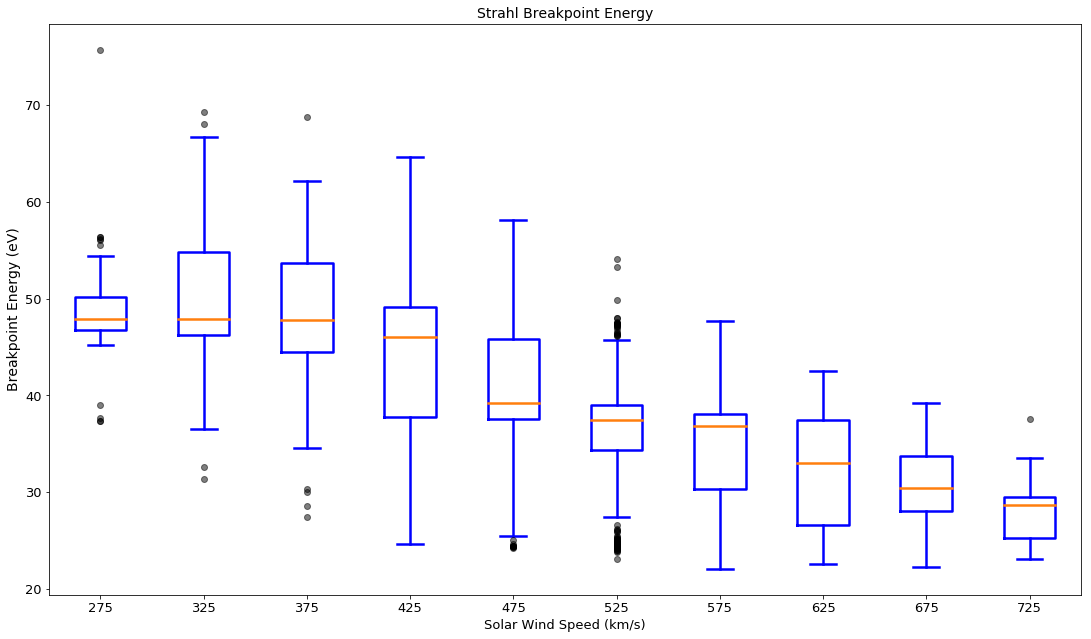

In [11]:
fig1, ax1 = plt.subplots()
fig1.set_size_inches(18.5, 10.5)
ax1.set_title('Strahl Breakpoint Energy',fontsize=14)
box_plot = ax1.boxplot(ta1)

## change outline color, fill color and linewidth of the boxes
for box in box_plot['boxes']:
    # change outline color
    box.set( color='b', linewidth=2.5)

## change color and linewidth of the whiskers
for whisker in box_plot['whiskers']:
    whisker.set(color='b', linewidth=2.5)

## change color and linewidth of the caps
for cap in box_plot['caps']:
    cap.set(color='b', linewidth=2.5)

## change color and linewidth of the medians
for median in box_plot['medians']:
    median.set(linewidth=2.5)

## change the style of fliers and their fill
for flier in box_plot['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

ax1.set_xticklabels(['275', '325', '375', '425', '475', '525', '575', '625', '675', '725'])
ax1.tick_params(labelsize=13)
ax1.set_xlabel('Solar Wind Speed (km/s)',fontsize=13)
ax1.set_ylabel('Breakpoint Energy (eV)',fontsize=14)

# Violin Plot Test

In [12]:
#halo
test_array = []
for i in range(10):
    test_array.append(np.array(ta[i]))  #need to convert pandas indexed arrays to numpy arrays for violinplot

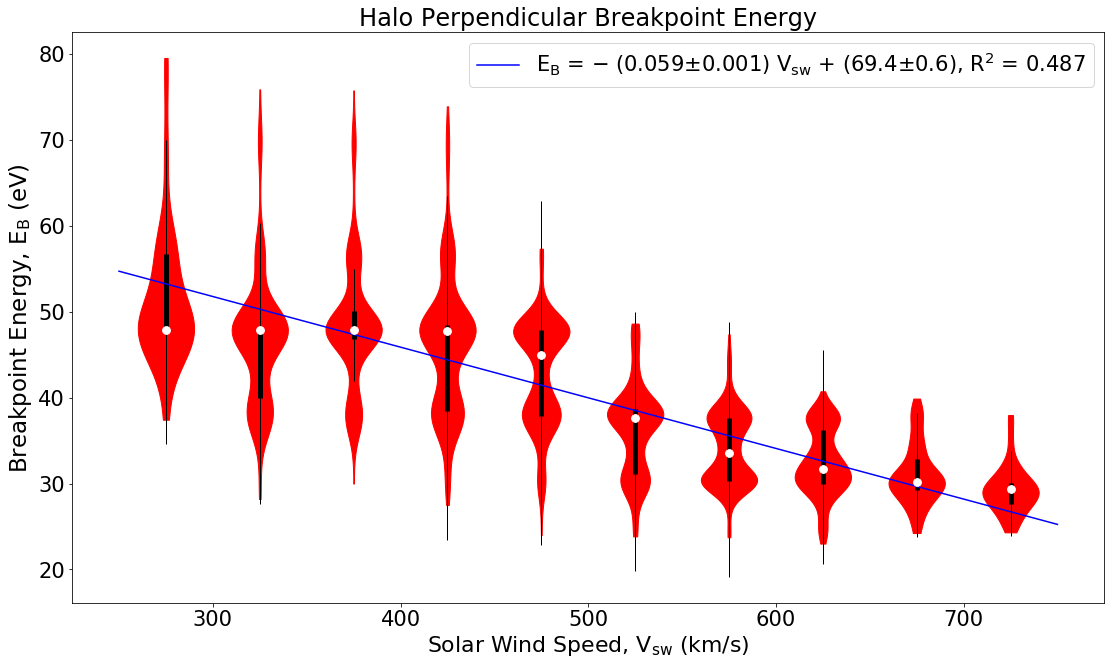

In [25]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

fig2, ax2 = plt.subplots()
fig2.set_size_inches(18.5, 10.5)
ax2.set_title('Halo Perpendicular Breakpoint Energy',fontsize=24)

x_array = np.linspace(250,750)
y_array = -0.0589*x_array + 69.421
plt.plot(x_array,y_array,color='b',label='E$_{\mathrm{B}}$ = $-$ (0.059$\pm$0.001) V$_{\mathrm{sw}}$ + (69.4$\pm$0.6), R$^{2}$ = 0.487')
ax2.legend(fontsize=21)

x_array_2 = np.linspace(250,500)
y_array_2 = -0.042*x_array_2 + 63.286
#plt.plot(x_array_2,y_array_2,color='g',label='E$_{\mathrm{B}}$ = $-$ (0.042$\pm$0.001) V$_{\mathrm{sw}}$ + (63.3$\pm$0.6), R$^{2}$ = 0.588')
#ax2.legend(fontsize=21)

x_array_3 = np.linspace(500,750)
y_array_3 = -0.035*x_array_3 + 54.365
#plt.plot(x_array_3,y_array_3,color='purple',label='E$_{\mathrm{B}}$ = $-$ (0.035$\pm$0.001) V$_{\mathrm{sw}}$ + (54.4$\pm$0.6), R$^{2}$ = 0.651')
#ax2.legend(fontsize=21)

x_pos = [275,325,375,425,475,525,575,625,675,725]
vp = ax2.violinplot(test_array,positions=x_pos,widths=30,showmedians=False,showextrema=False)
ax2.tick_params(labelsize=21)
ax2.set_xlabel('Solar Wind Speed, V$_{\mathrm{sw}}$ (km/s)',fontsize=22)
ax2.set_ylabel('Breakpoint Energy, E$_{\mathrm{B}}$ (eV)',fontsize=23)

for pc in vp['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('red')
    pc.set_alpha(1)

for i in range(0,10):
    quartile1, medians, quartile3 = np.percentile(test_array[i], [25, 50, 75])
    lower = quartile1 - (quartile3-quartile1)*1.5
    upper = quartile3 + (quartile3-quartile1)*1.5

    ax2.scatter(x_pos[i], medians, marker='o', color='white', s=60, zorder=3) #median
    ax2.vlines(x_pos[i], lower, upper, color='k', linestyle='-', lw=1) #q1-1.5*iqr to q3+1.5*iqr
    ax2.vlines(x_pos[i], quartile1, quartile3, color='k', linestyle='-', lw=5) #upper and lower quartiles

In [26]:
p, V = np.polyfit(df['Wind Speed'], df['BP'], 1, cov=True)
print('gradient = ', p[0],'+/-', np.sqrt(V[0][0]))
print('intercept = ', p[1],'+/-', np.sqrt(V[1][1]))

gradient =  -0.058940904558680535 +/- 0.0011789498016935422
intercept =  69.4213014192905 +/- 0.5823617289637455


In [27]:
#strahl
test_array1 = []
for i in range(10):
    test_array1.append(np.array(ta1[i]))

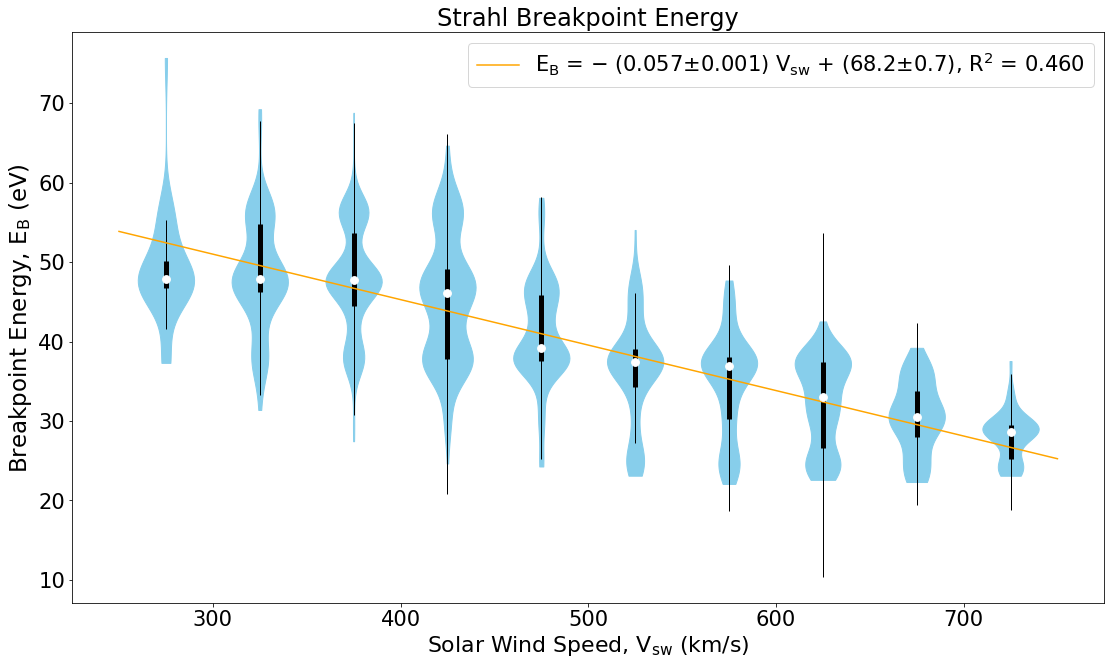

In [28]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    #upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    #lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

fig3, ax3 = plt.subplots()
fig3.set_size_inches(18.5, 10.5)
ax3.set_title('Strahl Breakpoint Energy',fontsize=24)

x_array1 = np.linspace(250,750)
y_array1 = -0.0572*x_array1 + 68.152
plt.plot(x_array1,y_array1,color='orange',label='E$_{\mathrm{B}}$ = $-$ (0.057$\pm$0.001) V$_{\mathrm{sw}}$ + (68.2$\pm$0.7), R$^{2}$ = 0.460')
ax3.legend(fontsize=21)

x_pos = [275,325,375,425,475,525,575,625,675,725]
vp1 = ax3.violinplot(test_array1,positions=x_pos,widths=30,showmedians=False,showextrema=False)
ax3.tick_params(labelsize=21)
ax3.set_xlabel('Solar Wind Speed, V$_{\mathrm{sw}}$ (km/s)',fontsize=22)
ax3.set_ylabel('Breakpoint Energy, E$_{\mathrm{B}}$ (eV)',fontsize=23)

for pc in vp1['bodies']:
    pc.set_facecolor('skyblue')
    pc.set_edgecolor('skyblue')
    pc.set_alpha(1)

for i in range(0,10):
    quartile1, medians, quartile3 = np.percentile(test_array1[i], [25, 50, 75])
    lower = quartile1 - (quartile3-quartile1)*1.5
    upper = quartile3 + (quartile3-quartile1)*1.5


    ax3.scatter(x_pos[i], medians, marker='o', color='white', s=60, zorder=3) #median
    ax3.vlines(x_pos[i], lower, upper, color='k', linestyle='-', lw=1) #q1-1.5*iqr to q3+1.5*iqr
    ax3.vlines(x_pos[i], quartile1, quartile3, color='k', linestyle='-', lw=5) #upper and lower quartiles

In [29]:
p, V = np.polyfit(df1['Wind Speed'], df1['BP'], 1, cov=True)
print('gradient = ', p[0],'+/-', np.sqrt(V[0][0]))
print('intercept = ', p[1],'+/-', np.sqrt(V[1][1]))

gradient =  -0.05718037705775598 +/- 0.001390965323941077
intercept =  68.15154317636691 +/- 0.688491250640829


# BP vs Tc: Halo

In [30]:
df = pd.read_excel('test_bp_tc.xlsx', sheet_name='Sheet1')
print("Column headings:")
print(df.columns)

Column headings:
Index(['Pd T_c', 'Pd_opt_BP', 'Pd BP_6'], dtype='object')


In [31]:
new_df = df.sort_values(by='Pd T_c')
sort_df = new_df[0:2675]

In [32]:
bins = np.linspace(1.0,8.0,8)
groups = sort_df.groupby(pd.cut(sort_df['Pd T_c'],bins))
print("Perpedicular halo medians:")
print(groups.mean())

Perpedicular halo medians:
              Pd T_c  Pd_opt_BP    Pd BP_6
Pd T_c                                    
(1.0, 2.0]  1.740777  29.521873  40.812451
(2.0, 3.0]  2.673947  31.973099  35.075696
(3.0, 4.0]  3.514965  35.845122  39.605667
(4.0, 5.0]  4.479482  41.739136  42.987901
(5.0, 6.0]  5.437458  47.389073  45.733379
(6.0, 7.0]  6.406376  53.486400  51.596781
(7.0, 8.0]  7.378284  58.723396  54.828556


In [33]:
#halo
ta = []
for i in range(7):
    ta.append(np.array(groups)[i,1]['Pd_opt_BP'])

In [34]:
#halo
test_array = []
for i in range(7):
    test_array.append(np.array(ta[i]))  #need to convert pandas indexed arrays to numpy arrays for violinplot

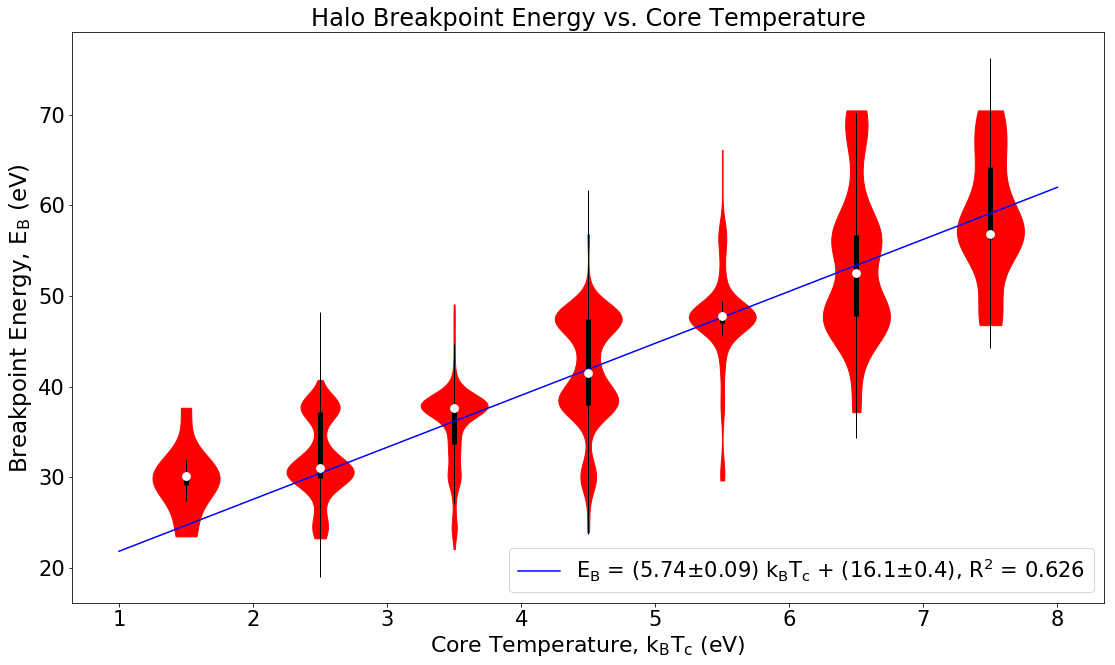

In [36]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

fig2, ax2 = plt.subplots()
fig2.set_size_inches(18.5, 10.5)
ax2.set_title('Halo Breakpoint Energy vs. Core Temperature',fontsize=24)

x_array = np.linspace(1,8)
y_array = 5.7352*x_array + 16.096
plt.plot(x_array,y_array,color='b',label='E$_{\mathrm{B}}$ = (5.74$\pm$0.09) k$_{\mathrm{B}}$T$_{\mathrm{c}}$ + (16.1$\pm$0.4), R$^{2}$ = 0.626')
ax2.legend(fontsize=21,loc='lower right')

x_pos = [1.5,2.5,3.5,4.5,5.5,6.5,7.5]
vp = ax2.violinplot(test_array,positions=x_pos,widths=0.5,showmedians=False,showextrema=False)
ax2.tick_params(labelsize=21)
ax2.set_xlabel("Core Temperature, k$_{\mathrm{B}}$T$_{\mathrm{c}}$ (eV)",fontsize=22)
ax2.set_ylabel('Breakpoint Energy, E$_{\mathrm{B}}$ (eV)',fontsize=23)

for pc in vp['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('red')
    pc.set_alpha(1)

for i in range(0,7):
    quartile1, medians, quartile3 = np.percentile(test_array[i], [25, 50, 75])
    lower = quartile1 - (quartile3-quartile1)*1.5
    upper = quartile3 + (quartile3-quartile1)*1.5

    ax2.scatter(x_pos[i], medians, marker='o', color='white', s=60, zorder=3) #median
    ax2.vlines(x_pos[i], lower, upper, color='k', linestyle='-', lw=1) #q1-1.5*iqr to q3+1.5*iqr
    ax2.vlines(x_pos[i], quartile1, quartile3, color='k', linestyle='-', lw=5) #upper and lower quartiles

In [37]:
p, V = np.polyfit(df['Pd T_c'], df['Pd_opt_BP'], 1, cov=True)
print('gradient = ', p[0],'+/-', np.sqrt(V[0][0]))
print('intercept = ', p[1],'+/-', np.sqrt(V[1][1]))

gradient =  5.735218460495934 +/- 0.0856397555078331
intercept =  16.09565262033731 +/- 0.38547670837602577


# BP vs Tc: Strahl

In [38]:
df = pd.read_excel('test_strahl_bp_tc.xlsx', sheet_name='Sheet1')
print("Column headings:")
print(df.columns)

Column headings:
Index(['TC_0', 'TC_opt', 'BP_opt', 'BP_3_0', 'BP_3_180', 'BP_5_180'], dtype='object')


In [39]:
new_df = df.sort_values(by='TC_opt')
sort_df = new_df[1:1971]

In [40]:
bins = np.linspace(1.0,9.0,9)
groups = sort_df.groupby(pd.cut(sort_df['TC_opt'],bins))
print("Strahl medians:")
print(groups.mean())

Strahl medians:
              TC_opt     BP_opt
TC_opt                         
(1.0, 2.0]  1.527223  29.308183
(2.0, 3.0]  2.554160  30.045714
(3.0, 4.0]  3.640771  34.432239
(4.0, 5.0]  4.514087  41.373890
(5.0, 6.0]  5.450236  48.330380
(6.0, 7.0]  6.449336  51.474235
(7.0, 8.0]  7.369302  53.668938
(8.0, 9.0]  8.349091  55.768392


In [41]:
ta = []
for i in range(8):
    ta.append(np.array(groups)[i,1]['BP_opt'])

In [42]:
test_array = []
for i in range(8):
    test_array.append(np.array(ta[i]))  #need to convert pandas indexed arrays to numpy arrays for violinplot

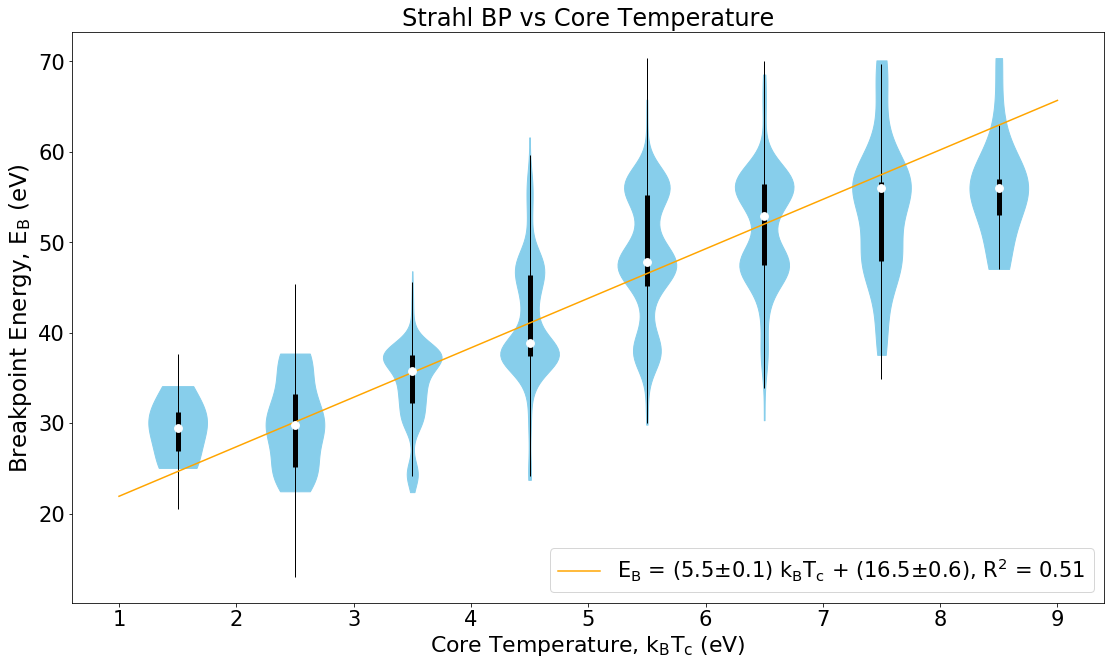

In [43]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    #upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    #lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

fig3, ax3 = plt.subplots()
fig3.set_size_inches(18.5, 10.5)
ax3.set_title('Strahl BP vs Core Temperature',fontsize=24)

x_array1 = np.linspace(1,9)
y_array1 = 5.4693*x_array1 + 16.464
plt.plot(x_array1,y_array1,color='orange',label='E$_{\mathrm{B}}$ = (5.5$\pm$0.1) k$_{\mathrm{B}}$T$_{\mathrm{c}}$ + (16.5$\pm$0.6), R$^{2}$ = 0.51')
ax3.legend(fontsize=21,loc='lower right')

x_pos = [1.5,2.5,3.5,4.5,5.5,6.5,7.5,8.5]
vp1 = ax3.violinplot(test_array,positions=x_pos,widths=0.5,showmedians=False,showextrema=False)
ax3.tick_params(labelsize=21)
ax3.set_xlabel('Core Temperature, k$_{\mathrm{B}}$T$_{\mathrm{c}}$ (eV)',fontsize=22)
ax3.set_ylabel('Breakpoint Energy, E$_{\mathrm{B}}$ (eV)',fontsize=23)

for pc in vp1['bodies']:
    pc.set_facecolor('skyblue')
    pc.set_edgecolor('skyblue')
    pc.set_alpha(1)

for i in range(0,8):
    quartile1, medians, quartile3 = np.percentile(test_array[i], [25, 50, 75])
    lower = quartile1 - (quartile3-quartile1)*1.5
    upper = quartile3 + (quartile3-quartile1)*1.5


    ax3.scatter(x_pos[i], medians, marker='o', color='white', s=60, zorder=3) #median
    ax3.vlines(x_pos[i], lower, upper, color='k', linestyle='-', lw=1) #q1-1.5*iqr to q3+1.5*iqr
    ax3.vlines(x_pos[i], quartile1, quartile3, color='k', linestyle='-', lw=5) #upper and lower quartiles

In [30]:
p, V = np.polyfit(df['TC_opt'], df['BP_opt'], 1, cov=True)
print('gradient = ', p[0],'+/-', np.sqrt(V[0][0]))
print('intercept = ', p[1],'+/-', np.sqrt(V[1][1]))

gradient =  5.469261307644532 +/- 0.12174912945760558
intercept =  16.463640461626493 +/- 0.6109183099496099


In [41]:
###### how to remove blank spaces
df = df[df.BP_Opt != ' ']